In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
data_actual = pd.read_csv('HistoricalSalesandActive Inventory_3years_testing_.csv', header=None)
data_actual.columns = ['Timestamp','Store','Item','Sales']
data_actual.head()

##pick item 1 and store 1
data_actual_1 = data_actual[ (data_actual['Store'] == 1) & (data_actual['Item'] == 1) & (data_actual['Sales'])] 
data_actual_1 = data_actual_1.iloc[0:48]
print(data_actual_1.shape)

(48, 4)


## Data Characteristics

<AxesSubplot:>

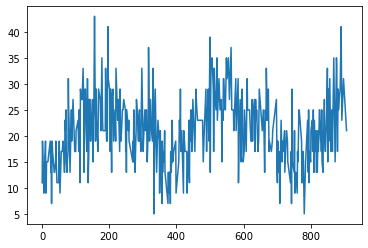

In [68]:
data_training = pd.read_csv('HistoricalSalesandActive Inventory_3years_training_.csv', header=None)
data_training.columns = ['Timestamp','Store','Item','Sales']
data_training_1 = data_training[ (data_training['Store'] == 1) & (data_training['Item'] == 1) & (data_training['Sales'])] 

data_training_1['Sales'].plot()

In [58]:
# Historical Sales and Active Inventory
data_p10 = pd.read_csv('deepAr/p10_result.csv')
data_p50 = pd.read_csv('deepAr/p50_result.csv')
data_p90 = pd.read_csv('deepAr/p90_result.csv')
# print(data_p50.info())
# print(data_p50.head())

## change timestamp start from 07/01/2017 to 121 date later
data_p10_plot = pd.DataFrame({
    'Timestamp': pd.date_range(start='7/01/2017', periods=121),
    'Values': data_p10['Value']
})

data_p50_plot = pd.DataFrame({
    'Timestamp': pd.date_range(start='7/01/2017', periods=121),
    'Values': data_p50['Value']
})

data_p90_plot = pd.DataFrame({
    'Timestamp': pd.date_range(start='7/01/2017', periods=121),
    'Values': data_p90['Value']
})

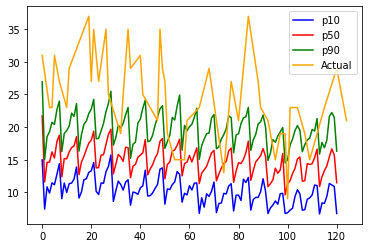

In [61]:
# plot forecasts against actual outcomes
plt.plot(data_p10_plot['Values'], label='p10', color='blue')
plt.plot(data_p50_plot['Values'], label='p50', color='red')
plt.plot(data_p90_plot['Values'], label='p90', color='green')
plt.plot(data_actual_1['Sales'], label='Actual', color='orange')
plt.legend()
plt.show()

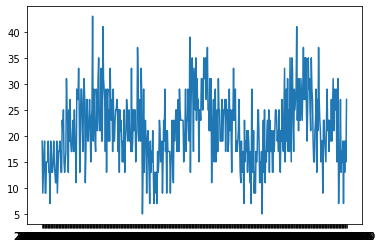

<Figure size 576x144 with 0 Axes>

In [4]:
#Visualize demand sales 
import matplotlib.pyplot as plt
%matplotlib inline
filter_data = data[ (data['store'] == 1) & (data['item'] == 1) & (data['sales'])] 
# filter_data = filter_data[(filter_data['date'] > '2017-01-01') & (filter_data['date'] < '2017-01-31')]
x = filter_data['date'] 
y = filter_data['sales']  
plt.plot(x, y)
plt.figure(figsize=(8, 2))
plt.show()

In [49]:
# evaluate an ARIMA model using a walk-forward validation
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [50]:
#univariate dataset only use sales collumn
# split into train and test sets
X = filter_data['sales'].values
size = int(len(X) * 0.66)
print(size)
train, test = X[0:size], X[size:len(X)]
print(len(train))
print(len(test))
    #convert to array 
history = [x for x in train]
predictions = list()

106
106
55


In [51]:
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=27.664020, expected=15.000000
predicted=25.827179, expected=15.000000
predicted=20.878671, expected=21.000000
predicted=18.906909, expected=23.000000
predicted=18.675360, expected=29.000000
predicted=20.487645, expected=13.000000
predicted=20.892108, expected=27.000000
predicted=21.260870, expected=21.000000
predicted=23.033204, expected=37.000000
predicted=23.745671, expected=27.000000
predicted=26.252528, expected=23.000000
predicted=26.436794, expected=21.000000
predicted=26.023757, expected=15.000000
predicted=24.908149, expected=19.000000
predicted=21.260874, expected=19.000000
predicted=19.885271, expected=9.000000
predicted=17.102084, expected=23.000000
predicted=15.950657, expected=23.000000
predicted=19.031155, expected=19.000000
predicted=19.017533, expected=17.000000
predicted=18.173480, expected=15.000000
predicted=18.906009, expected=23.000000
predicted=19.118460, expected=29.000000
predicted=20.929886, expected=21.000000
predicted=21.456903, expected=23.000000
p

Test RMSE: 6.632


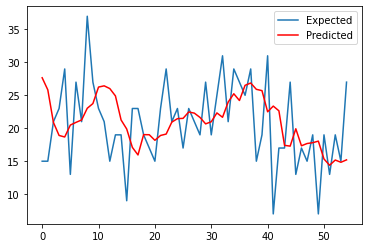

In [52]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test, label='Expected')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()

In [53]:
# xgboost
from xgboost import XGBRegressor
import numpy
from sklearn.metrics import mean_absolute_error

In [54]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

[[ 1.  1. 15. ...  1.  1. 13.]
 [ 1.  1. 11. ...  1.  1. 21.]
 [ 1.  1. 17. ...  1.  1.  9.]
 ...
 [ 1.  1. 17. ...  1.  1. 19.]
 [ 1.  1. 15. ...  1.  1. 15.]
 [ 1.  1. 19. ...  1.  1. 27.]]
102
>expected=21.0, predicted=16.2
>expected=23.0, predicted=18.4
>expected=29.0, predicted=20.2
>expected=13.0, predicted=20.7
>expected=27.0, predicted=13.7
>expected=21.0, predicted=20.9
>expected=37.0, predicted=21.4
>expected=27.0, predicted=24.7
>expected=23.0, predicted=26.4
>expected=21.0, predicted=28.2
>expected=15.0, predicted=33.2
>expected=19.0, predicted=19.3
>expected=19.0, predicted=20.3
>expected=9.0, predicted=20.4
>expected=23.0, predicted=19.7
>expected=23.0, predicted=16.1
>expected=19.0, predicted=17.8
>expected=17.0, predicted=17.5
>expected=15.0, predicted=18.8
>expected=23.0, predicted=17.3
>expected=29.0, predicted=18.4
>expected=21.0, predicted=21.0
>expected=23.0, predicted=21.0
>expected=17.0, predicted=18.4
>expected=23.0, predicted=25.4
>expected=21.0, predicted=20.6

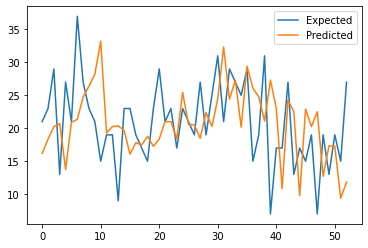

In [56]:
# transform the time series data into supervised learning
def xgboost_forecast(train, testX):
	# transform list into array
	train = numpy.asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data):
	predictions = list()
	# split dataset
	size = int(len(data) * 0.66)
	print(size)
	train, test = data[0:size], data[size:len(data)]
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	# error = mean_absolute_error(test[:, -1], predictions)
	error = sqrt(mean_squared_error(test[:, -1], predictions))
	
	return error, test[:, -1], predictions

# load the dataset
series = filter_data.loc[:, filter_data.columns != 'date']
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
print(data)
# evaluate
error, y, yhat = walk_forward_validation(data)
print('RMSE: %.3f' % error)
# plot expected vs preducted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()